In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
corr=df.corr()

<AxesSubplot: >

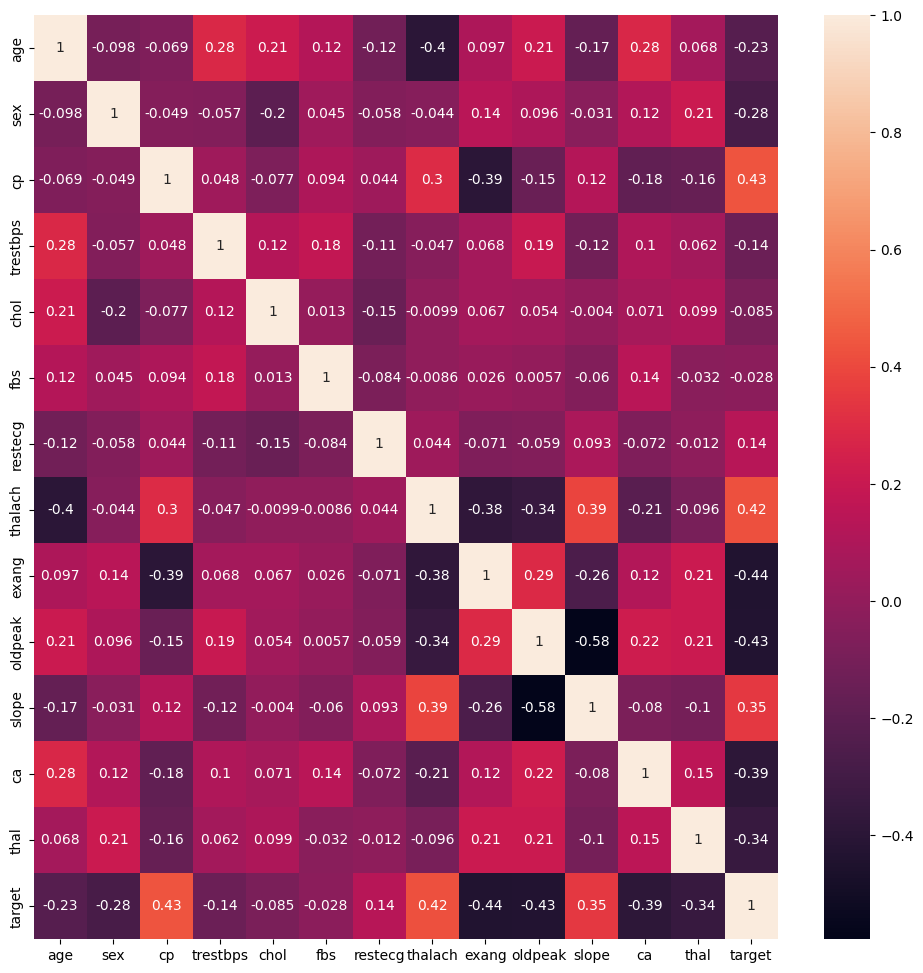

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

In [7]:
df[df.target==0].shape

(138, 14)

In [8]:
df[df.target==1].shape

(165, 14)

In [9]:
##data is not imbalanced

In [10]:
df.duplicated()# no duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
target=df.target
df.drop(columns=["target"],inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler
obj1=StandardScaler()


In [14]:
# columns_to_scale=["age","trestbps","chol","thalach","oldpeak","cp"]
# df[columns_to_scale]=obj.fit_transform(df[columns_to_scale])

In [15]:
df=obj1.fit_transform(df)

In [16]:
df

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [31]:
# target=df.target
# df.drop(columns=["target"],inplace=True)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
test={
    'logistic_regression' : {
        'model' : LogisticRegression(),
        'params' : {
            'C':[1,10]
        }
    },
    'svc' : {
        'model' : SVC(gamma="auto"),
        'params' : {
            'C':[1,10,20],
            'kernel' :['rbf','linear','poly']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(criterion='gini'),
        'params' : {
            'n_estimators':[80,100,125]
        }
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(criterion='gini',
    splitter='best',
),
        'params' : {
        }
    },
    "KNeighborsClassifier" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [10,12,14]
        }
    }
}

In [29]:
from sklearn.model_selection import GridSearchCV
ans=[]
for name,md in test.items() :
    obj=GridSearchCV(md['model'],md['params'],cv=5)
    obj.fit(df,target)
    temp={}
    temp['name']=name
    temp['best_params']=obj.best_params_
    temp['best_score']=obj.best_score_
    ans.append(temp)

In [30]:
pd.DataFrame(ans)

,name,best_params,best_score
0,logistic_regression,{'C': 1},0.834863
1,svc,"{'C': 1, 'kernel': 'linear'}",0.831639
2,random_forest,{'n_estimators': 80},0.825082
3,DecisionTreeClassifier,{},0.742295
4,KNeighborsClassifier,{'n_neighbors': 12},0.831639


In [36]:
model=LogisticRegression(C=1)
model.fit(x_train,y_train)

LogisticRegression(C=1)

In [37]:
model.score(x_test,y_test)

0.868421052631579

In [39]:
from sklearn.model_selection import cross_val_score
listt=cross_val_score(model,df,target,cv=5)

In [40]:
listt.mean()

0.8348633879781422

In [41]:
import pickle

In [42]:
pickle.dump(model,open("heart.pkl","wb"))